In [40]:
import torch
import numpy as np

## STEP 1. 데이터 만들기

In [90]:
# case 1
N=20
random0=torch.randn(int(N/2),1)
random5=torch.randn(int(N/2),1)+5
class1_data=torch.hstack([random0,random5])
class2_data=torch.hstack([random5,random0])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

#case 2
N=100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

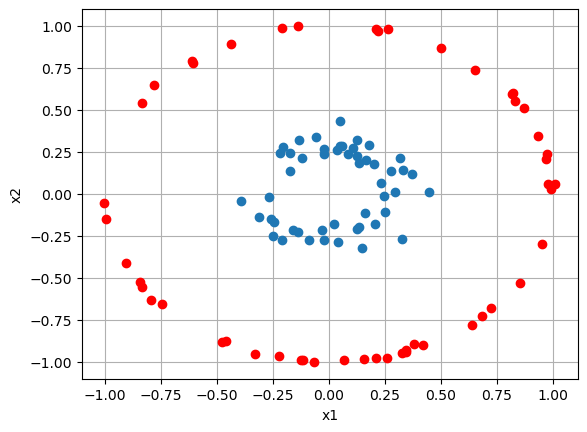

In [91]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

## STEP 2. 모델 만들기

In [92]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        #case 1, plain
        self.linear = nn.Sequential(nn.Linear(2, 100), # 키와 몸무게
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())

        # case 1, very simple
        self.linear = nn.Sequential(nn.Linear(2, 1),
                                    # nn.Sigmoid(),
                                    # nn.Linear(1000, 1), delete hidden layer
                                    nn.Sigmoid())

        # case 1, deep
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())

        #case 2, plain
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())

        # case 2, very simple
        self.linear = nn.Sequential(nn.Linear(2, 1),
                                    # nn.Sigmoid(),
                                    # nn.Linear(1000, 1), delete hidden layer
                                    nn.Sigmoid())

        # case 2, deep
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())

    def forward(self, x):
        x = self.linear(x)
        return x


In [93]:
model = MLP()
print(model(torch.randn(5, 2))) # 2개 값으로 이루어진 좌표값 (x1, x2) 데이터 5개를 입력함

tensor([[0.5128],
        [0.4587],
        [0.4856],
        [0.5025],
        [0.4976]], grad_fn=<SigmoidBackward0>)


## STEP 3. 모델 학습 시키기

In [94]:
from torch import optim
import torch.nn.functional as F

LP = 1e-1
EPOCH = 100

#optimizer = optim.SGD(model.parameters(), lr = LP)
optimizer = optim.Adam(model.parameters(), lr = LP) # case 1, deep

loss_history = []

model.train() # train mode로 전환

for ep in range(EPOCH):

    # inference
    y_hat = model(X)


    # loss
    loss = F.binary_cross_entropy(y_hat, y) # 순서 주의!! (통과시킨값, 진짜 정답)

    # update
    optimizer.zero_grad() # gradient 누적을 막지 위한 초기화 -> 안하면 gradient가 계속 누적돼서 가중치 업데이트가 잘못된다.
    loss.backward() # backpropagation
    optimizer.step() # weight update

    # print loss
    loss_history.append(loss.item()) # 숫자만 가져오자! .item()
    print(f"Epoch: {ep+1}, train loss: {round(loss.item(),3)}")
    print("-"*20)

Epoch: 1, train loss: 0.694
--------------------
Epoch: 2, train loss: 2.407
--------------------
Epoch: 3, train loss: 0.847
--------------------
Epoch: 4, train loss: 1.336
--------------------
Epoch: 5, train loss: 1.664
--------------------
Epoch: 6, train loss: 1.299
--------------------
Epoch: 7, train loss: 0.778
--------------------
Epoch: 8, train loss: 0.732
--------------------
Epoch: 9, train loss: 1.009
--------------------
Epoch: 10, train loss: 1.111
--------------------
Epoch: 11, train loss: 0.998
--------------------
Epoch: 12, train loss: 0.797
--------------------
Epoch: 13, train loss: 0.675
--------------------
Epoch: 14, train loss: 0.707
--------------------
Epoch: 15, train loss: 0.804
--------------------
Epoch: 16, train loss: 0.855
--------------------
Epoch: 17, train loss: 0.829
--------------------
Epoch: 18, train loss: 0.755
--------------------
Epoch: 19, train loss: 0.685
--------------------
Epoch: 20, train loss: 0.659
--------------------
Epoch: 21

<hr>

### ` optimizer.zero_grad()`의 중요성,,,

In [29]:
x = torch.tensor([1.], requires_grad=True)

for _ in range(2):
    loss = x ** 2
    loss.backward() # 누적이되노,,?
    print(x.grad)
    x.grad = None # 누적 방지..

tensor([2.])
tensor([4.])


In [16]:
x = torch.tensor([[1.], [2.], [3.], [4.]])
y = 2 * x

# 모델 정의
model = nn.Linear(1, 1, bias=False)  # w만 학습, 편향은 제외
optimizer = optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

print("zero_grad()를 생략한 경우")
for epoch in range(5):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    loss.backward()              # gradient 누적!
    optimizer.step()             # weight update
    print(f"epoch {epoch+1}, weight: {model.weight.item():.4f}, loss: {loss.item():.4f}")

zero_grad()를 생략한 경우
epoch 1, weight: 3.4377, loss: 62.0130
epoch 2, weight: 5.5944, loss: 15.5033
epoch 3, weight: 2.3594, loss: 96.8953
epoch 4, weight: -1.4146, loss: 0.9690
epoch 5, weight: -0.0668, loss: 87.4480


In [17]:
model = nn.Linear(1, 1, bias=False)
optimizer = optim.SGD(model.parameters(), lr=0.1)

print("zero_grad()를 사용하는 경우")
for epoch in range(5):
    optimizer.zero_grad()         # 🔥 이거 추가!
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    print(f"epoch {epoch+1}, weight: {model.weight.item():.4f}, loss: {loss.item():.4f}")

zero_grad()를 사용하는 경우
epoch 1, weight: 2.7521, loss: 16.9674
epoch 2, weight: 1.6240, loss: 4.2419
epoch 3, weight: 2.1880, loss: 1.0605
epoch 4, weight: 1.9060, loss: 0.2651
epoch 5, weight: 2.0470, loss: 0.0663


<hr>

###

In [77]:
print(F.binary_cross_entropy(y_hat, y))
print(-torch.sum(torch.log(y_hat ** y * (1 - y_hat) ** (1-y))) / N)

tensor(0.0028, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0028, grad_fn=<DivBackward0>)


Text(0, 0.5, 'loss')

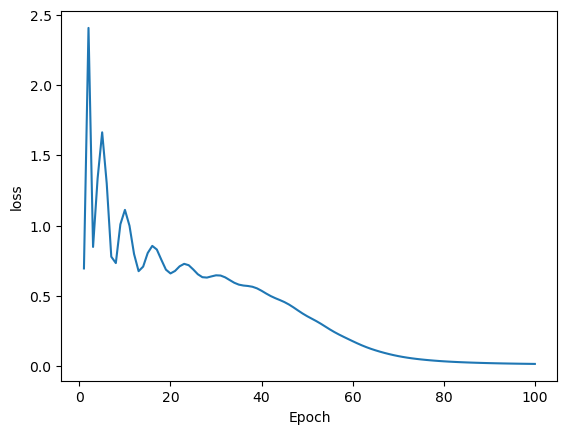

In [95]:
plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')

## STEP 4. 모델 테스트하기

In [98]:
x1_test=torch.linspace(-10,10,30) # case 1
x2_test=torch.linspace(-10,10,30) # case 1

x1_test=torch.linspace(-2,2,30) # case 2
x2_test=torch.linspace(-2,2,30) # case 2


X1_test, X2_test=torch.meshgrid(x1_test, x2_test)
X_test=torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2) # 개 개 체 로 만들기
print(X_test.shape)
model.eval() # test mode로 !!!!!!!!!!!중요하다!!!!!!!!!!

'''
왜 모델을 train mode, test mode로 변경하면서 진행,,?

대표적으로 Dropout 그리고 Batch Normalization 때문!!

1. Dropout -> 몇 명 연차 쓰더라도 일이 잘 돌아가게 훈련, test 땐 전원 출근
              노드가 필요 이상으로 너무 많다면? -> loss를 잘 줄이지만 기계적으로 정답을 맞출 뿐..
              -> overfitting -> 몇 명 연차 보내가며 훈련 -> " 각 노드가 역할 분담을 잘함 "

    * 랜덤하게 노드 가려보면서 학습시키자!! -> for overfitting 방지!
    * 서로 다른 thinned network 여러 개를 사용해서 학습 후
    * 테스트 때는 애네들을 평균내서 사용(by 앙상블)
    * 적용시키고 싶은 layer에 dropout 적용, p는 layer 별로 정한다 (hyperparameter)
    * 네트워크에 통과 시킬 때마다 살릴 노드 다시 고름!! (데이터마다 다시 다 정한다.)
    * test 때에는 다 살린다잉..!

2. Batch Normalization
'''

# y_hat = model(X_test)
# print(y_hat) -> 근데 이놈들은 굳이 이제 미분할 필요가 없잖슴...
# grad_fn 계산 -> 메모리가 불필요하게 쓰인다.

with torch.no_grad():
    y_hat = model(X_test)

Y_hat = y_hat.squeeze()
print(y_hat.shape)
print(Y_hat)

torch.Size([30, 30, 2])
torch.Size([30, 30, 1])
tensor([[9.4089e-03, 6.7996e-03, 4.2566e-03, 2.5102e-03, 1.5175e-03, 9.5733e-04,
         6.2325e-04, 4.2508e-04, 3.1393e-04, 2.5300e-04, 2.1900e-04, 2.0208e-04,
         2.0398e-04, 2.4292e-04, 3.7652e-04, 7.8325e-04, 2.0954e-03, 6.1240e-03,
         1.2674e-02, 1.5366e-02, 1.3854e-02, 1.0950e-02, 8.0416e-03, 5.7296e-03,
         4.0807e-03, 2.8823e-03, 1.9215e-03, 1.1593e-03, 6.6949e-04, 4.2148e-04],
        [1.0802e-02, 9.5240e-03, 7.1946e-03, 4.6124e-03, 2.6785e-03, 1.5517e-03,
         9.3301e-04, 5.8592e-04, 3.9369e-04, 2.9178e-04, 2.3963e-04, 2.1708e-04,
         2.2305e-04, 2.8276e-04, 4.8991e-04, 1.1924e-03, 3.8168e-03, 1.1753e-02,
         2.0421e-02, 1.9524e-02, 1.4934e-02, 1.0796e-02, 7.5825e-03, 5.2777e-03,
         3.6690e-03, 2.4707e-03, 1.5285e-03, 8.7564e-04, 5.2145e-04, 3.5615e-04],
        [1.0152e-02, 1.0545e-02, 9.6543e-03, 7.6162e-03, 5.0075e-03, 2.8655e-03,
         1.5845e-03, 9.0557e-04, 5.5018e-04, 3.6725e-04, 2.

In [88]:
Y_hat.shape

torch.Size([30, 30])

Text(0.5, 0.5, 'x2')

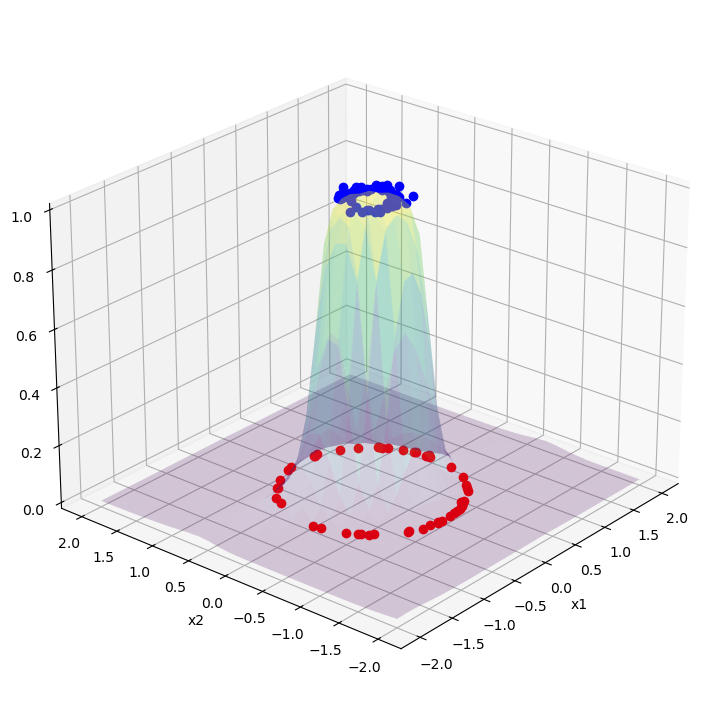

In [99]:
plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test,X2_test, Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data [:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")

In [100]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='binary classification', width=700, height=600)